# Plot the EEG layout 
import MNE library

In [16]:
#!python
#!/usr/bin/env python
from scipy.io import loadmat
import numpy as np
import mne
import os
import matplotlib.pyplot as plt

load data into workspace 

In [9]:
fp = os.path.join('data', 'H0048P(2).mat')
data = loadmat(fp)

create the MNE DigMontage object 

In [10]:
ch_names = np.concatenate(data['chlocs']['labels'][0]).tolist()
fsample = data['srate'].item(0)
Ntrial = data['EEG'].shape[0]
time_axis = np.arange(0, Ntrial, 1) / fsample
data_eeg = np.transpose(data['EEG'])
info = mne.create_info(ch_names=ch_names, sfreq=fsample, ch_types='eeg')

load the electrode position (x, y, z)

In [11]:
elec = data['channel_position']
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names, elec)),
                                        coord_frame='head')

load the raw data into MNE object

In [12]:
raw = mne.io.RawArray(data_eeg, info)
raw.set_montage(montage)

Creating RawArray with float64 data, n_channels=60, n_times=1468506
    Range : 0 ... 1468505 =      0.000 ...  1012.762 secs
Ready.


<RawArray  |  None, n_channels x n_times : 60 x 1468506 (1012.8 sec), ~672.4 MB, data loaded>

plot layout 

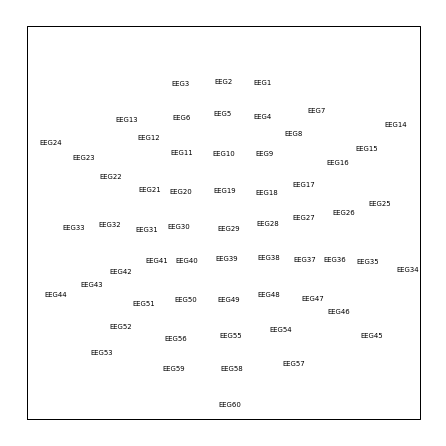

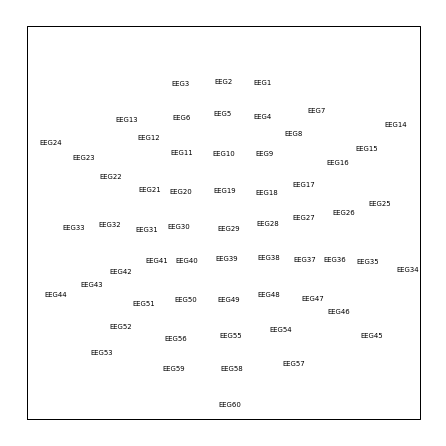

In [13]:
# Plot the montage of
layout_from_raw = mne.channels.make_eeg_layout(raw.info)
layout_from_raw.plot()


plot sensor position 

Creating RawArray with float64 data, n_channels=60, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


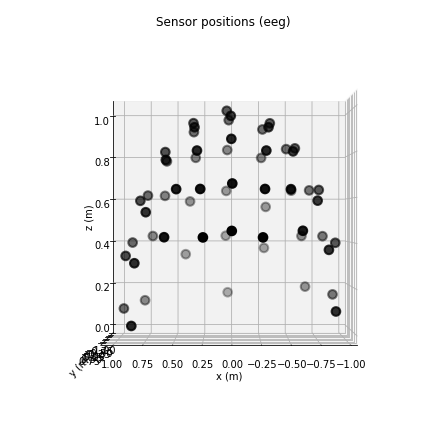

Creating RawArray with float64 data, n_channels=60, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


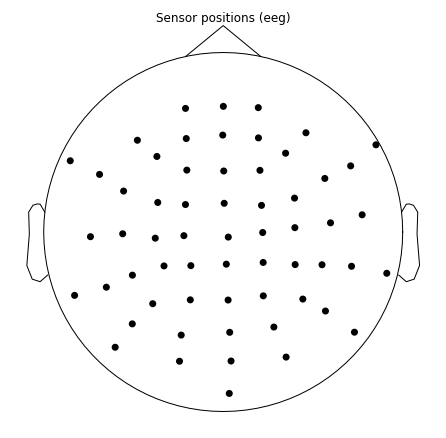

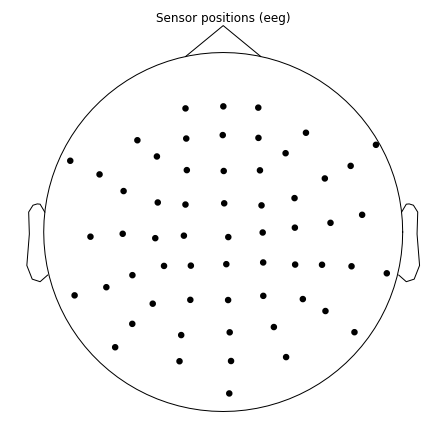

In [17]:
fig = montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
montage.plot(kind='topomap', show_names=False)